<div align="center"> <h1> WHO Life Expectancy Prediction Model Report</h1> </div>

<img src="https://data.org/wp-content/uploads/2024/01/WHO_logo.svg" style="width:100%; height:200px; object-fit:cover;" />

The **objective** of this project is to create a robust predictive model using linear regression with a low margin of error.

### Table of Contents
 - 01: Exploratory Data Analysis
 - 02: Modelling
 - 03: Function
 - 04: Conclusions

## 01: Exploratory Data Analysis

This section explores the data, looking only at the features.

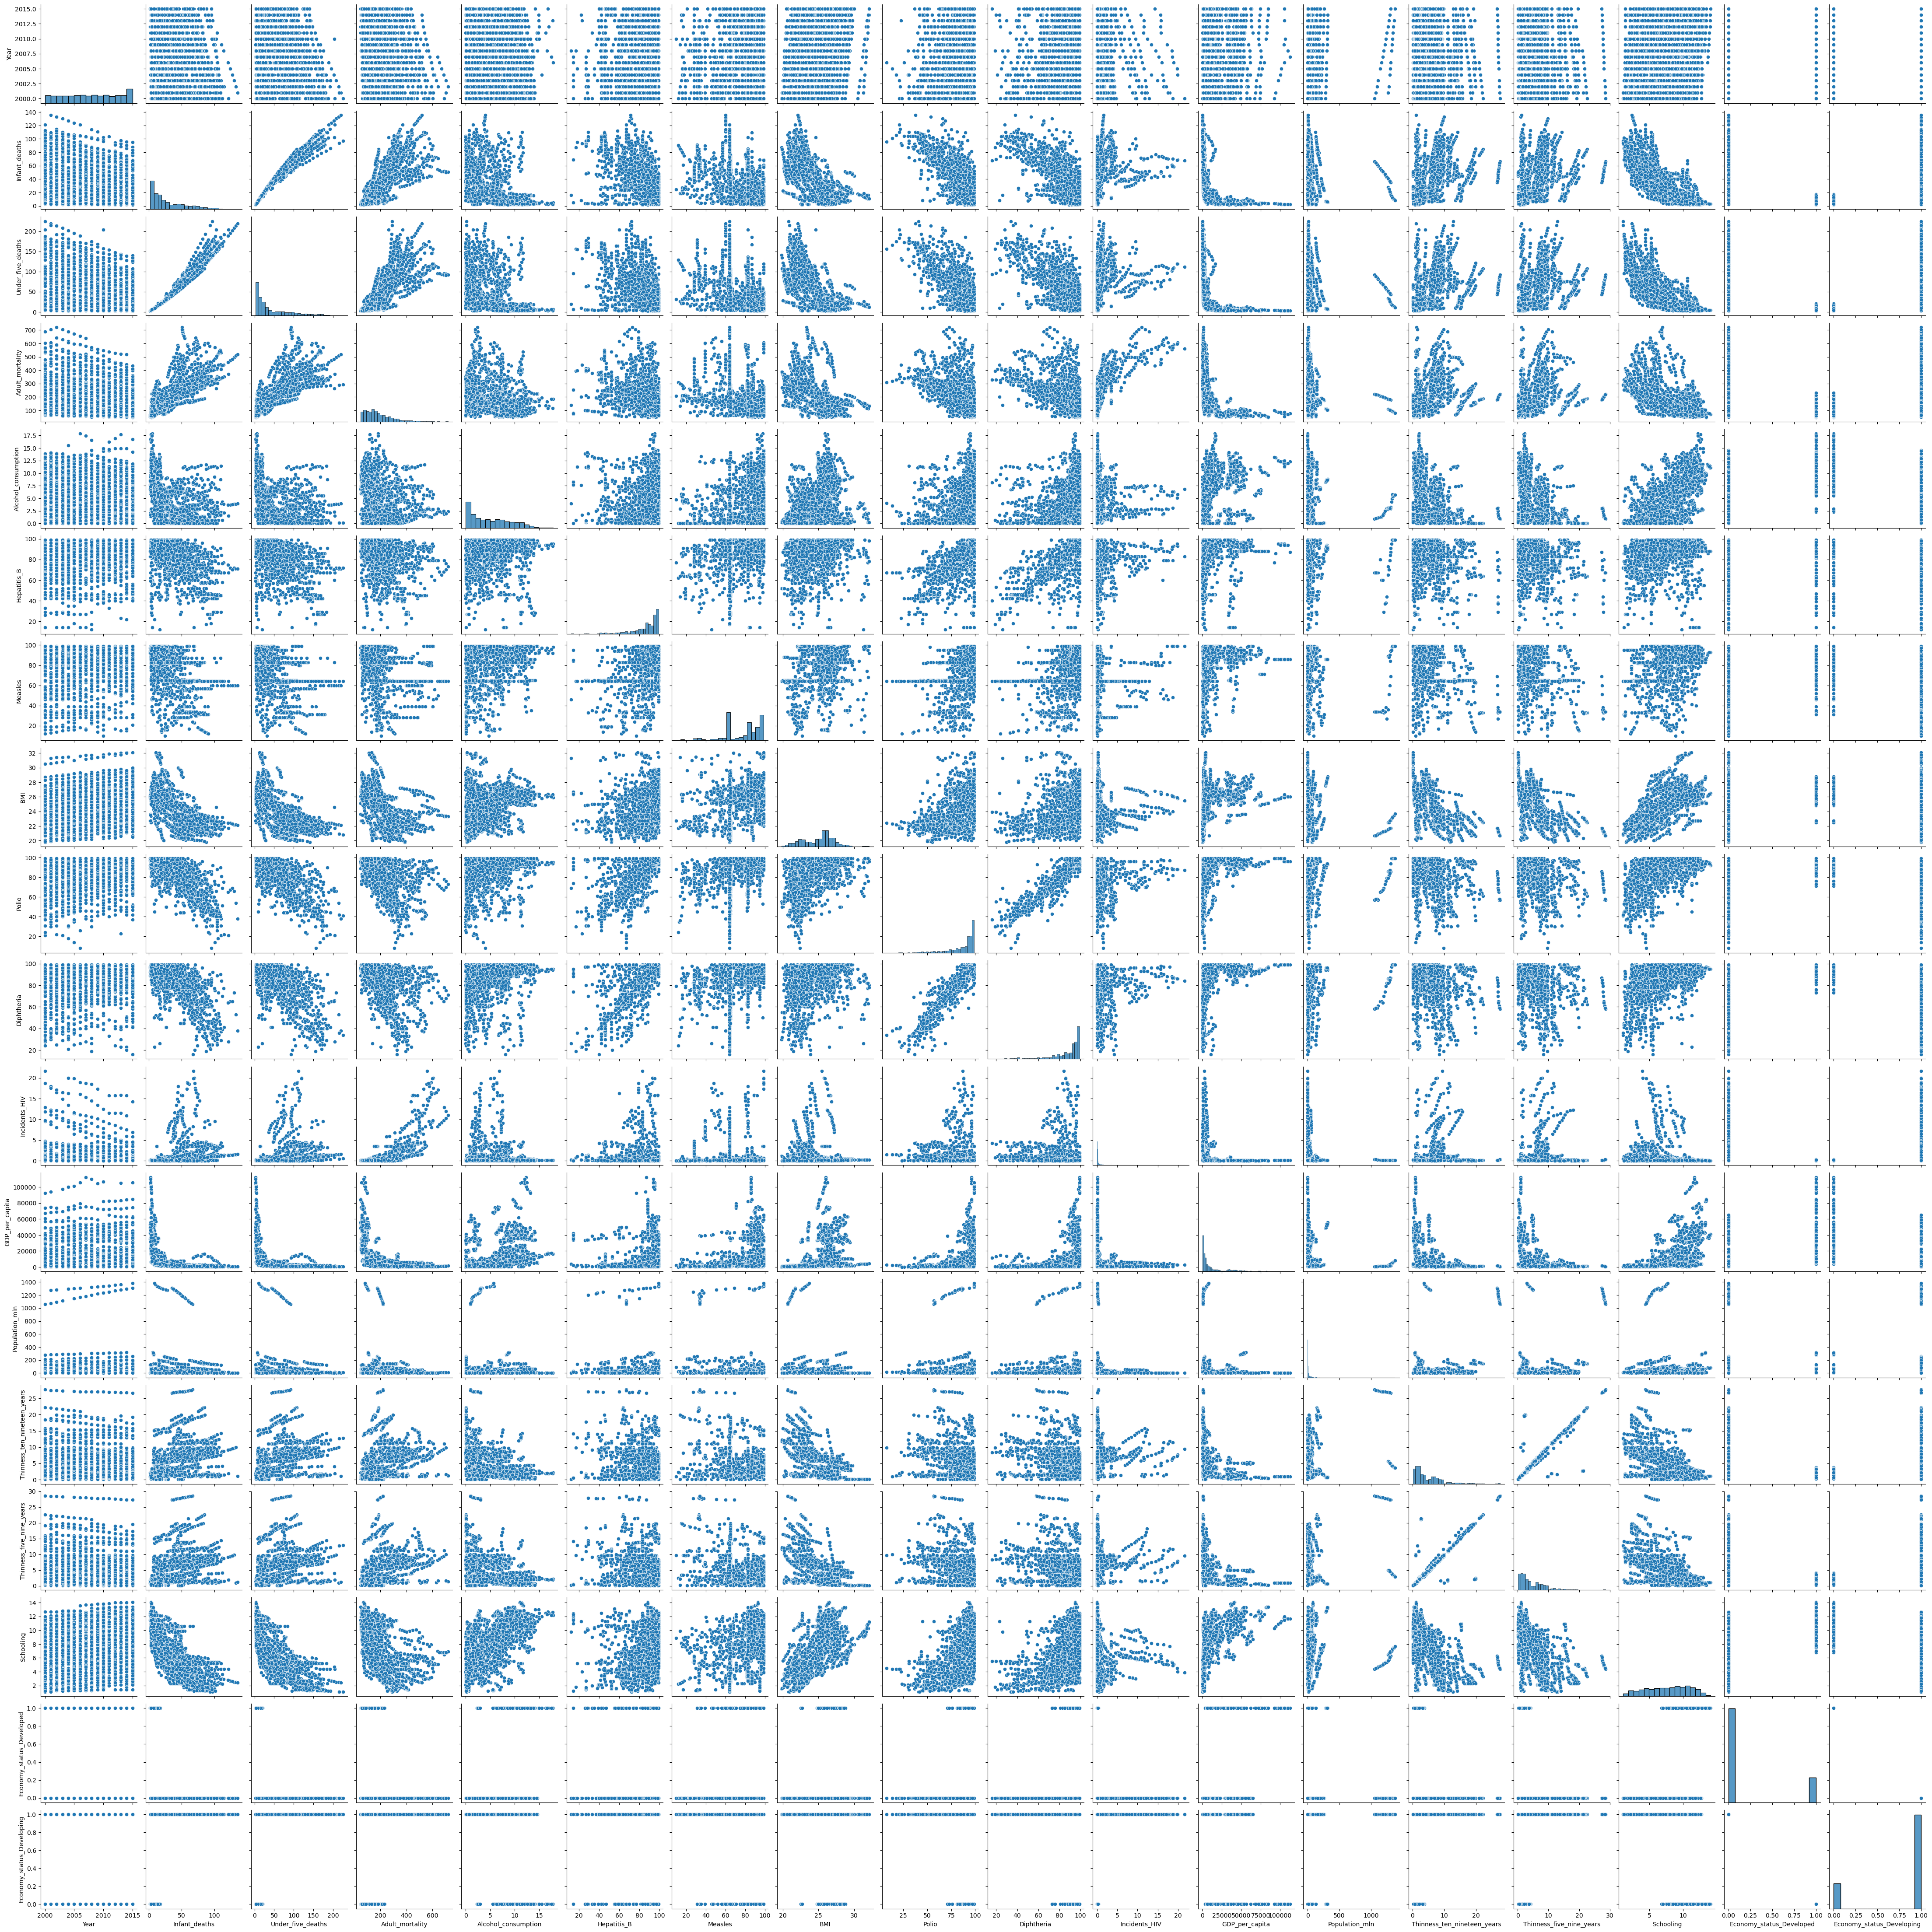

In [20]:
# Plot to check if features correlate
sns.pairplot(X_train)
plt.show()
# This is where much correlation was found which will be discussed.

In [18]:
# Check if features correlate
X_train.corr(numeric_only = True)
# There is much correlation which will be explored below

Year  Infant_deaths  Under_five_deaths  \
Year                         1.000000      -0.166987          -0.173002   
Infant_deaths               -0.166987       1.000000           0.985559   
Under_five_deaths           -0.173002       0.985559           1.000000   
Adult_mortality             -0.160566       0.790127           0.796894   
Alcohol_consumption         -0.011917      -0.457119          -0.411995   
Hepatitis_B                  0.173951      -0.523656          -0.517944   
Measles                      0.100920      -0.532122          -0.517842   
BMI                          0.163505      -0.664765          -0.668032   
Polio                        0.143414      -0.757319          -0.757067   
Diphtheria                   0.143439      -0.732269          -0.734438   
Incidents_HIV               -0.073243       0.346492           0.365264   
GDP_per_capita               0.031673      -0.512212          -0.469483   
Population_mln               0.017157       0.012562          -0.001350   
Thinness_ten_nineteen_years -0.028415       0.492220           0.467700   
Thinness_five_nine_years    -0.027731       0.473671           0.444876   
Schooling                    0.141069      -0.790817          -0.775062   
Economy_status_Developed    -0.002625      -0.477742          -0.428818   
Economy_status_Developing    0.002625       0.477742           0.428818   

                             Adult_mortality  Alcohol_consumption  \
Year                               -0.160566            -0.011917   
Infant_deaths                       0.790127            -0.457119   
Under_five_deaths                   0.796894            -0.411995   
Adult_mortality                     1.000000            -0.244712   
Alcohol_consumption                -0.244712             1.000000   
Hepatitis_B                        -0.356860             0.164923   
Measles                            -0.421311             0.318572   
BMI                                -0.524746             0.281078   
Polio                              -0.532140             0.306812   
Diphtheria                         -0.517695             0.302975   
Incidents_HIV                       0.701337            -0.038731   
GDP_per_capita                     -0.511678             0.428484   
Population_mln                     -0.049957            -0.043214   
Thinness_ten_nineteen_years         0.382310            -0.443923   
Thinness_five_nine_years            0.379181            -0.428027   
Schooling                          -0.578142             0.615504   
Economy_status_Developed           -0.429726             0.665906   
Economy_status_Developing           0.429726            -0.665906   

                             Hepatitis_B   Measles       BMI     Polio  \
Year                            0.173951  0.100920  0.163505  0.143414   
Infant_deaths                  -0.523656 -0.532122 -0.664765 -0.757319   
Under_five_deaths              -0.517944 -0.517842 -0.668032 -0.757067   
Adult_mortality                -0.356860 -0.421311 -0.524746 -0.532140   
Alcohol_consumption             0.164923  0.318572  0.281078  0.306812   
Hepatitis_B                     1.000000  0.445263  0.357382  0.729668   
Measles                         0.445263  1.000000  0.427792  0.514954   
BMI                             0.357382  0.427792  1.000000  0.472448   
Polio                           0.729668  0.514954  0.472448  1.000000   
Diphtheria                      0.764510  0.491064  0.437540  0.954173   
Incidents_HIV                  -0.086491 -0.163666 -0.159530 -0.156491   
GDP_per_capita                  0.153677  0.313545  0.339945  0.312770   
Population_mln                 -0.092612 -0.117099 -0.170947 -0.041151   
Thinness_ten_nineteen_years    -0.218026 -0.354023 -0.594729 -0.322823   
Thinness_five_nine_years       -0.222853 -0.378576 -0.590578 -0.316673   
Schooling                       0.351560  0.505946  0.636530  0.562496   
Economy_status_Developed        0.106

#### 1.1 Ethical Considerations:
- Medical records: sensitive data - vaccination rates
- Omitting countries - ethical and modelling reasons
- Some columns were already omitted: percentage expenditure, total expenditure, income composition of resources

#### 1.2) Observations
- Thinness in both age groups are correlated as the ages overlap.
- Strong correlation between infant death and under 5 death - multicollinearity.
- Somewhat of a negative correlation between child and adolescent thinness and BMI
- Positive correlation between diptheria and polio and hepatitis b.

**1.3) Columns that show potential multicolinearity:**   
When analysing the correlation matrix for the features of our model, the decision was made to drop certain columns to reduce multicolinearity in this model. 

Infant deaths: 
- between ages of 0-1 already represented in under 5 deaths 

Thinness 5-9 and Thinness 10-19:
- both correlated to each other and other features e.g. ‘Schooling’ 

HIV: 
- highly correlated to ‘Adult Mortality’ which we considered more valuable in predicting life expectancy

Diptheria and Polio: 
- both highly correlated to infant deaths, each other and Hepatitis B

BMI: 
- BMI can be considered flawed and racially biased 
Not a very representative indicator of health 

Alcohol: 
- correlations between ‘Schooling’ and ‘Economy Status (both Developed and Developing)’

Economy Status Developing: 
- Only needed one of either ‘Economy Status Developed’ and ‘Economy Status Developing’

**1.4) Columns that do not seem useful:**
- Year


## 02: Modelling

#### 2.1: Importing libraries and reading the data

In [1]:
#Importing the four main libraries
import numpy as np # for maths
import seaborn as sns # to augment matplotlib/visuals
import matplotlib.pyplot as plt # visuals
import pandas as pd # data

# We use train/test split for our data
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Modelling library : stats models
import statsmodels.api as sm # contains the model
import statsmodels.tools # contains the metrics

# Metrics from sklearn
from sklearn import metrics

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  \
0         105.8240                 1.32           97       65  27.8     97   
1          57.9025                10.35           97       94  26.0     97   
2         201.0765                 1.57           60       35  21.2     67   
3         222.1965                 5.68           93       74  25.3     92   
4          57.9510                 2.89           97       89  27.0     94   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7

In [5]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

#### 2.2: Train/test split

In [12]:
def train_test(df):
    df = df.copy()
    feature_cols = list(df.columns) # Selects all the columns
    feature_cols.remove('Life_expectancy') # Removes the target
    X = df[feature_cols] # Dataframe which holds all the features
    y = df['Life_expectancy'] # The target to predict
    # Train/test split data
    X_train, X_test, y_train, y_test = train_test_split(X, # features
                                                    y, # target
                                                    test_size = 0.2, # The % allocated to test
                                                    random_state = 56) # Random state - python will retain the shuffle of dataset
    return X_train, X_test, y_train, y_test

In [14]:
# Run function to create train test split
X_train, X_test, y_train, y_test = train_test(df)

In [16]:
# Sanity check for the split
print(all(X_train.index == y_train.index)) # Check training indices match
print(all(X_test.index == y_test.index)) # Check testing indices match

True
True


In [21]:
# To look at central tendencies of training dataset.
X_train.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2291.000000    2291.000000        2291.000000      2291.000000   
mean   2007.479703      30.244784          42.739502       192.095924   
std       4.577513      27.570828          44.606758       115.015409   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2004.000000       8.000000           9.500000       106.619750   
50%    2007.000000      19.600000          23.000000       163.665500   
75%    2011.000000      47.000000          65.250000       246.907750   
max    2015.000000     135.600000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2291.000000  2291.000000  2291.000000  2291.000000   
mean              4.899096    84.517241    77.372326    25.041510   
std               3.991650    15.766086    18.652059     2.198898   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.260000    79.000000    64.000000    23.300000   
50%               4.160000    89.000000    83.000000    25.500000   
75%               7.865000    96.000000    93.000000    26.500000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2291.000000  2291.000000    2291.000000     2291.000000   
mean     86.629419    86.398516       0.882641    11646.965081   
std      14.913614    15.480219       2.366347    17024.414747   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1396.500000   
50%      93.000000    93.000000       0.150000     4164.000000   
75%      97.000000    97.000000       0.430000    12747.500000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2291.000000                  2291.000000               2291.000000   
mean        37.493854                     4.854430                  4.868573   
std        139.585148                     4.493481                  4.566888   
min          0.080000                     0.100000                  0.100000   
25%          2.090000                     1.600000                  1.600000   
50%          7.700000                     3.300000                  3.300000   
75%         24.055000                     7.100000                  7.100000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  
count  2291.000000               2291.000000                2291.000000  
mean      7.655696                  0.210388                   0.789612  
std       3.177926                  0.407674                   0.407674  
min       1.100000                  0.000000                   0.000000  
25%       5.100000                  0.000000                   1.000000  
50%       7.900000                  0.000000                   1.000000  
75%      10.300000                  0.000000                   1.000000  
max      14.100000                  1.000000                   1.000000

#### 2.3: Feature Engineering

In [23]:
## Applying feature engineering on X-train

def feature_eng(df):
        # create a local copy of the data
        df = df.copy() 
        # drop column country and year
        if 'Country' or 'Year' in df.columns:
            df = df.drop(columns=['Country', 'Year'], errors='ignore')
        if 'Region' in df.columns:
        # OHE the relevant columns
            df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region', dtype = int) # OHE
        return df


In [24]:
#Robust Scaler
def scaler_rob(df):
    rob = RobustScaler() ## Initial scaler
    rob.fit(df) ## Fit the data
    df_scaled = rob.transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
    df_scaled = sm.add_constant(df_scaled)
    #Return our result
    return df_scaled

In [25]:
## Transform X_train
X_train_fe = feature_eng(X_train)

In [26]:
## Scale X_train
X_train_fe = scaler_rob(X_train_fe)

In [ ]:
X_train_fe.head()

#### 2.4.1: Statistical Model: Basic

This is the model that does not use sensitive data.

In [30]:
## Create a train OLS linear regression for both models
def ols_lin(y_train, X_train_fe, feature_cols):
    lin_reg = sm.OLS(y_train, X_train_fe[feature_cols]) # creates model
    results = lin_reg.fit() # fit model and store it
    return results

In [31]:
# Basic features: 
# After scaling, the model had a low RMSE 2.36 low condition no. 19.7
feature_cols = ['const',
       'Adult_mortality', 'GDP_per_capita', 'Economy_status_Developed'] 

In [32]:
## Summary table
results = ols_lin(y_train, X_train_fe, feature_cols)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     7929.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        10:18:41   Log-Likelihood:                -5598.5
No. Observations:                2291   AIC:                         1.120e+04
Df Residuals:                    2287   BIC:                         1.123e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       70.0839      0.075    938.266      0.000      69.937      70.230
Adult_mortality             -9.8937      0.084   -118.332      0.000     -10.058      -9.730
GDP_per_capita               0.4584      0.055      8.374      0.000       0.351       0.566
Economy_status_Developed     2.4365      0.192     12.715      0.000       2.061       2.812
==============================================================================
Omnibus:                       86.996   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.779
Skew:                          -0.208   Prob(JB):                     4.15e-44
Kurtosis:                       4.385   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Gets our predictions and stores them in y_pred
y_pred = results.predict(X_train_fe[feature_cols])

# Gets the RMSE of our model: y_train(real) against y_pred (predicted)
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

2.7863579182091773


In [34]:
## Feature engineering the X_test set 

# FE X_test using the same function
X_test_fe = feature_eng(X_test)

## Scale X_test
X_test_fe = scaler_rob(X_test_fe)

# Select exact same features
X_test_fe = X_test_fe[feature_cols]


In [35]:
# Test prediction
y_test_pred = results.predict(X_test_fe) # holds predictions on the testing set

# Testing RMSE
rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse_test)

2.6991472715912836


#### 2.42: Statistical Model: Optimised

This is the model that uses sensitive data.

In [38]:
# Sensitive features:  
feature_cols_sens = ['const', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America', 'Under_five_deaths',
       'Adult_mortality', 'Hepatitis_B', 'GDP_per_capita',
        'Schooling', 'Economy_status_Developed'] 
# After scaling, the above value is 1.23, condition no. 22.5


In [39]:
## Summary table
results_sens = ols_lin(y_train, X_train_fe, feature_cols_sens)
results_sens.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     9200.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        10:18:41   Log-Likelihood:                -3743.1
No. Observations:                2291   AIC:                             7516.
Df Residuals:                    2276   BIC:                             7602.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   71.0526      0.088    805.118      0.000      70.880      71.226
Region_Asia                              0.0999      0.102      0.976      0.329      -0.101       0.301
Region_Central America and Caribbean     1.5821      0.117     13.549      0.000       1.353       1.811
Region_European Union                   -1.0539      0.178     -5.936      0.000      -1.402      -0.706
Region_Middle East                      -0.1985      0.134     -1.485      0.138      -0.461       0.064
Region_North America                     0.0132      0.241      0.055      0.956      -0.459       0.485
Region_Oceania                          -1.4878      0.138    -10.765      0.000      -1.759      -1.217
Region_Rest of Europe                   -0.0189      0.136     -0.138      0.890      -0.286       0.249
Region_South America                     1.3377      0.134     10.002      0.000       1.075       1.600
Under_five_deaths                       -4.6524      0.081    -57.658      0.000      -4.811      -4.494
Adult_mortality                         -6.3166      0.060   -105.695      0.000      -6.434      -6.199
Hepatitis_B                             -0.1085      0.034     -3.153      0.002      -0.176      -0.041
GDP_per_capita                           0.2762      0.027     10.060      0.000       0.222       0.330
Schooling                                0.4909      0.084      5.831      0.000       0.326       0.656
Economy_status_Developed                 2.7251      0.166     16.460      0.000       2.400       3.050
==============================================================================
Omnibus:                       56.541   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.216
Skew:                           0.283   Prob(JB):                     2.82e-17
Kurtosis:                       3.692   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
## Actual performance on training data

# Gets our predictions and stores them in y_pred
y_pred_sens = results_sens.predict(X_train_fe[feature_cols_sens])

# Gets the RMSE of our model: y_train(real) against y_pred (predicted)
rmse_sens = statsmodels.tools.eval_measures.rmse(y_train, y_pred_sens)

print(rmse_sens)

1.239731158192832


In [41]:
## Feature engineering the X_test set 

# FE X_test using the same function
X_test_fe_sens = feature_eng(X_test)

## Scale X_test
X_test_fe_sens = scaler_rob(X_test_fe_sens)

# Select exact same features
X_test_fe_sens = X_test_fe_sens[feature_cols_sens]


In [42]:
# Test prediction
y_test_pred_sens = results_sens.predict(X_test_fe_sens) # holds predictions on the testing set

# Testing RMSE
rmse_test_sens = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred_sens)
print(rmse_test_sens)

1.2258343044468383


#### 2.5: Observations after the running the model
**Second Iteration of EDA-**
**Columns with low statistical significance (high p-values):**
- Alcohol
- Measles 
- Population 

**VIF and Stepwise**
- Used before scaling and was not effective (condition no. was very high so not robust)
- After scaling, the condition number was suitably small so we did not want to compromise the RMSE or the quality of the model by reducing it further.

## 03: Function

This can be found in the function notebook.

## 04: Conclusions

### 4.1 Evaluation of sensitive model:
- Performance was worse compared to the optimised model with an RMSE value of 2.7 (which tells us the margin of error of our life expectancy model predictions)
- This model performs quite well considering the limited amount of data used for predictions (Region / Adult mortality / GDP per capita / Economy status).
- In addtion it had an excellent condition number (19.7) indicating very low levels of collinearity in the modelling and general numerical issues, this is understandable since we have few features.

### 4.11 Evaluation of optimised model: 
- This model is suitable for more accurate predictions giving a low 1.23 margin of error.
- Requires sensitive data and may not be usable for everybody.
- Performed well in reducing condition no. with a value of 22.5 (Slightly worst compared to sensitive model but expected due to increased features).

### 4.2 Limitations:
- The model groups countries by region and assumes that countries within a region are not unique which is false.
- Potentially outdated data (Data from early 2000s is now 20+ years old)
- Limited dataset more information would be required to give a better model (e.g smoking / drug use).
- Model does not handle if country has gone from developing to developed in the time period.

### 4.3 Implications and Applications:
- A model like this could be used to inform public health policies e.g. vaccinations.
- Can lead to discrimination - individuals with lower life expectancy can face barriers when accessing healthcare.
- If country chooses to give more sensitive information, data protection should be in places.
- Individual effect of life expectancy prediction - can lead to reduced mental well-being.